# 	Interactive exploration with widgets and dashboards

Here, we will use a motivating example that looks at CO$_2$ data for Mauna Loa and takes advantage of:
- [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/latest/index.html) and 
- [Voilà dashboards](https://voila.readthedocs.io/en/latest/?badge=latest)

The example we follow is adapted from the [Intro-Jupyter tutorial from ICESat-2Hackweek](https://github.com/ICESAT-2HackWeek/intro-jupyter), which has contributions from: [Shane Grigsby (@espg)](https://github.com/espg), [Lindsey Heagy (@lheagy)](https://github.com/lheagy), [Yara Mohajerani (@yaramohajerani)](https://github.com/yaramohajerani), and [Fernando Pérez (@fperez)](https://github.com/fperez). 

## 1. 👋  Hello

 

```{figure} img/lindsey.jpg
---
height: 280px
name: im-lindsey
---
Hi, I'm Lindsey 
```


- I am currently a Postdoc at UC Berkeley in the Department of Statistics
- I will be joining UBC-EOAS as an Asst. Prof in July 2021 
- My PhD was in computational geophysics (modelling and inversions)
- Throughout my academic career, I have been involved in development of open source software in Python & open educational resources


## 2. Motivating example: CO$_2$ at Mauna Loa

**Question:** Based on historical CO$_2$ data, can we estimate what CO$_2$ concentrations will be in the future? 

Scripps institute of Oceanography has a research station at Mauna Loa in Hawaii where they have been measuring atmospheric CO$_2$ since 1958. The data we will focus on are the seasonally adjusted data. 

![scrippsco2](https://scrippsco2.ucsd.edu/assets/images/mlo_station_map.png)

**Data Source**

C. D. Keeling, S. C. Piper, R. B. Bacastow, M. Wahlen, T. P. Whorf, M. Heimann, and  H. A. Meijer, Exchanges of atmospheric CO2 and 13CO2 with the terrestrial biosphere and  oceans from 1978 to 2000.  I. Global aspects, SIO Reference Series, No. 01-06, Scripps  Institution of Oceanography, San Diego, 88 pages, 2001. https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html   

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from matplotlib import rcParams
rcParams["font.size"] = 14

### 2.1 What are our data? 

Before we dive into widgets, lets take a look at our data. The measured atmospheric data are the column titled `co2`. In this data set, there is one measurement per month. The seasonally adjusted data are what we will work with -- these smooth over the 6 month seasonal variations. For details on how this correction is applied, see the original [excel file](./data/monthly_in_situ_co2_mlo.csv). 

In [3]:
co2_data_source = "./data/monthly_in_situ_co2_mlo.csv"
co2_data = pd.read_csv(
    co2_data_source, skiprows=np.arange(0, 56), na_values="-99.99"
)

co2_data.columns = [
    "year", "month", "date (int)", "date", "co2", "seasonally adjusted",
    "fit", "seasonally adjusted fit", "co2 filled", "seasonally adjusted filled" 
]

Text(0, 0.5, 'CO$_2$ concentration [ppm]')

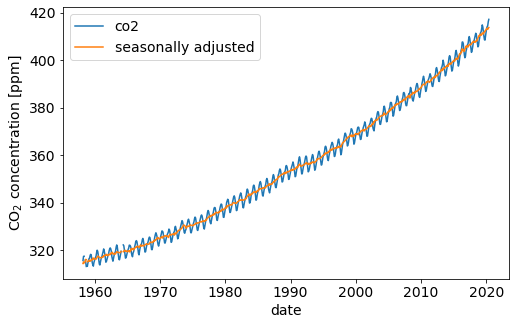

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
co2_data.plot("date", ["co2", "seasonally adjusted"], ax=ax)
ax.set_ylabel("CO$_2$ concentration [ppm]")

In the [demo repository](https://github.com/lheagy/ubc-jupyterdays-2020-widgets), we will explore building linear models using the "eye-ball" norm with widgets. To follow along:

- UBC Students & Faculty: [![Syzygy](https://img.shields.io/badge/launch-syzygy-important)](https://ubc.syzygy.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Flheagy%2ubc-jupyterdays-2020-widgets&urlpath=tree%2Fubc-jupyterdays-2020-widgets%2F&branch=master)
- or if you don't have a UBC CWL: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/lheagy/ubc-jupyterdays-2020-widgets/master)
- or you can follow the [installation instructions on the repository](https://github.com/lheagy/ubc-jupyterdays-2020-widgets#installing) 

## 3. Jupyter widgets 

[Jupyter widgets](https://ipywidgets.readthedocs.io/en/latest/index.html) allow you to connect interactive controls such as slide bars and toggle buttons to your code. 

They can be used to create ["notebook apps"](https://jupyter4edu.github.io/jupyter-edu-book/catalogue.html#notebook-as-an-app) that abstract away details of the code and focus conversations on the role of parameters in a computation, or be a quick way to create a "Just-in-time-research-GUI" (GUI: graphical user interface) to explore results. 

![widget-conversation](./img/widgets-simulations.png)


### Getting started

Widgets can be [installed](https://ipywidgets.readthedocs.io/en/latest/user_install.html) with pip 

```
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension
```

or conda (which also enables the extension) 
```
conda install -c conda-forge ipywidgets
```

To enable the Jupyter Lab extension
```
jupyter labextension install @jupyter-widgets/jupyterlab-manager
```

For your first interaction with widgets, I recommend trying out `interact`. The `interact` function [`ipywidgets.interact`](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) is a quick way to create user interface controls on your functions. At the most basic level, `interact` autogenerates controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use `interact`, you need to define a function that you want to explore.

### Demo! 

- The [ubc-jupyterdays-2020-widgets](https://github.com/lheagy/ubc-jupyterdays-2020-widgets) contains notebooks which demonstrate using widgets to explore data as well as a notebook which covers some of the basics of using widgets.
- UBC Students & Faculty can run on Syzygy: [![Syzygy](https://img.shields.io/badge/launch-syzygy-important)](https://ubc.syzygy.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Flheagy%2ubc-jupyterdays-2020-widgets&urlpath=tree%2Fubc-jupyterdays-2020-widgets%2F&branch=master)
- or if you don't have a UBC CWL you can use: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/lheagy/ubc-jupyterdays-2020-widgets/master)


## 4. Voilà Dashboards

> [Voilà](https://voila.readthedocs.io/en/stable/using.html#using-voila) turns Jupyter notebooks into standalone web applications.
> 
> Unlike the usual HTML-converted notebooks, each user connecting to the Voilà tornado application gets a dedicated Jupyter kernel which can execute the callbacks to changes in Jupyter interactive widgets.

- The [intro blog](https://blog.jupyter.org/and-voil%C3%A0-f6a2c08a4a93) provides an overview and resources for getting up and running with Voilà
- The [Voilà gallery](https://voila-gallery.org/) has a collection of examples built with Voilà and Jupyter widgets. 


### Getting Started

Voilà can be installed using `conda`

```
conda install -c conda-forge voila
```

or from PyPI
```
pip install voila
```

Once Voilà has been installed, 

- you can run it as a standalone server 
  
  ```
  voila notebook.ipynb
  ```
  
  
- or as a server extention by changing the url to `<url-of-my-server>/voila` (e.g. if you launched `jupyter lab` locally, and it was running at `http://localhost:8888/lab`, then then Voilà would be accessed at `http://localhost:8888/voila`.


- there is also a JupyterLab extention for previewing your dashboard
   
   ```
   jupyter labextension install @jupyter-voila/jupyterlab-preview
   ```

- by default, Voilà will strip out the source code from view. It can be displayed if the option `strip_sources` is set to False


### Demo! 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/lheagy/ubc-jupyterdays-2020-widgets/master?urlpath=voila%2Frender%2F2-voila.ipynb)